# $S_n$-Equivariant Convolutional Quantum Alternating Algorithms

In this tutorial we explain the $S_n$-Equivariant Convolutional Quantum Alternating ($S_n$-CQA) Algorithms proposed in https://arxiv.org/abs/2112.07611, where we illustrate its practical significance in approximating the ground state of the frustrated anti-ferromagnetic Heisenberg Hamiltonian on various 2D lattices. 

## Contents
1. [Introduction](#introduction)
2. [$S_n$-CQA Algorithms](#cqatheory)
    1. [Symmetries in Quantum Computing](#symmetry)
    2. [Significance in Machine Learning](#ml)
    3. [Description of the $Sn$-CQA](#cqadescription)
    4. [Adiabatic Description at $p \rightarrow \infty$](#adiabetic)
3. [Implementation](#implementation)
    1. [Finding the ground state on the square lattice model](#square)
    2. [Finding the ground state on the Kagome kattice model](#kagome)
4. [References](#references)

## Introduction <a id='introduction'></a>

A key question in quantum algorithms is to identify the possible source for a quantum speedup --ideally we are looking for a typical class of problems that allow an exponential speedup in the quantum computers versus that in a classical device. As running on a quantum device might be diffulct to access and expansive to run, an exponenetial speed-up seems to be the few likely motivations for us to try on quantum computers! 

As C.N.Yang once said: “symmetry dictates interaction.” Symmetry pops up everywhere, from standard model of particle physics, rotating and charged black holes, covariant quantum error correcting codes, Heisenberg model in condensed matter physics, classical description moleuclar force fields, graph ismorphism problems, the list goes on and on. 

A natural possible source of the quantum advantage comes from studying inherent symmetry of problems. In physics, symmetry imposes constraints with respect to the problems we are solving, and such contraints normally involve in calculating certain cofficients using group representation theory. Often these coefficients are believed not to be computed in polynomial time. Similarly in the rapid evolving fields of machine learning, learning with symmetry or more generally equivariance has emerged as the dominant paradigm in learning molecular graphs, force fields, and protein strcutures. 

As proposed in https://arxiv.org/abs/2112.07611, the authors studied how we can possibly leverage the use of quantum computers to speed up the calculation of these certain representation-theoretical coefficients and how we can use these advantage to design novel quantum algorigthms to solve physical problem of interests that is classically hard. As a consequence the proposed $S_n$-Equivariant Convolutional Quantum Alternating ($S_n$-CQA) Algorithms is developed to answer these questions and we will show its effectiveness in solving a physically hard problem$--$ground states of the frustrated magnets! 

## 2. $S_n$-CQA Algorithms <a id='cqatheory'></a>

### A. Symmetries in Quantum Computing <a id='symmetry'></a>

In quantum computing there are two types of symmetries: continous symmetry on qubits and discrete symmetries. In qubits the continuous symmetries could be U($1$) or SU($2$) symmetry on each qubit, for instance:
$$
\exp(i\theta_0 X_0 ) \exp(i \theta_1 X_1) \exp(i \theta_2 X_2) | 000 \rangle
$$

while the discrete symmetries are simply permuting a set of qubits, such a the SWAP gate:
$$
\text{SWAP} | 01 \rangle = | 10 \rangle
$$
It seems that these two set of symmetries are not related to each other: how does a bit flip could possibly have something do with swapping qubits? Meretriciously, there is a deep connection between these two types of symmetries, called the Schur-Weyl duality. Loosly speaking the Schur-Weyl duality states: (a) SWAPS and Pauli rotations defined above commute with each other, so they can be block-diagnolized simultaneously, (b) Their block-diagonal structures can be organized into a bigger block, labelled by a a partition of n letters.  


A $\textbf{partition}, \lambda = (\lambda_1, ..., \lambda_d),$ of n letters or qubits, where $\sum^{d}_{i=1} \lambda_i = n$, is described by a corresponding $\textbf{Young diagram}$:

In quantum computing each partition $\lambda$ restricts to Hilbert space $ \mathcal{H} = \mathbb{C}^{2^n} \times \mathbb{C}^{2^n}$ to a unique block consisted of SU($2$) and $S_n$ actions. 

The framework of global SU($d$)-symmetry is first proposed by Jordan (2009) in his seminal paper "Permutational Quantum Computing" (PQC) where a possible source of quantum advantage is formulated by being able to matrix elements of elements in the symmetric group $S_n$, for instance SWAP(1,5), swapping first and fifth qubit. These matrix elements lives thse blocks labelled by partition $\lambda$ and are thought to be classically hard aka take exponenetial time to compute. Howeber, PQC offers a polynomial time algorithm to approximate these matrix elements. This sounds really neat; is this an end of story? 

It turns out there nevertheless exists polynomial time classical algorithm to compute these matrix elements on qubits. A natural question raised is how can generalize PQC further to restore hope in quantum advantage? Also, along this pursuit, can we identify useful problems to solve? 





### B. Significance in Machine Learning <a id='ml'></a>

Let's say if we wish to predict properties of a moulecular system. The first-principle approach based on the density functional approximation requires far too large computational resources in a moderately-sized molecular system so it is quite common to use neural networks to approximate its quantum effects. Suppose we wish to predict the ground state energy $E_0$ or the first-excited state energy $E_1$. We know these quantities are invariant under global rotation SO($3$). It does not make sense if what the neural network learned does not respect this SO($3$) symmetry. 

Furthermore, molecules are naturally representated by the molecular graphs. So an other necessary contraint is our neural network model is $\textit{equivariant}$ to the permutation on vertex labels in graphs. Roughly speaking this means that our neural network should be smart enough to recoginze two molecular graphs to be the same if they only differ from relabelling of vertices. 

What we have described is the so-called equivariant graph neural networks, a leading neural network in learning molecular graphs and other graphical models. To dig into the math, the natural mathematical concept is the so-called equivariant convolution.

Let $f_{1}, f_{2} \in \mathbb{C}\left[G\right]$. Their convolution is defined as
$$
\left(f_{1} * f_{2}\right)(\sigma):=\sum_{\tau \in G} f_{1}(\tau) f_{2}\left(\tau^{-1} \sigma\right),
$$
Mathematically the equivariance with respect to a group $G$ takes the meaning that acting $G$ on $f_1$ and then convolve with $f_2$ equals to convolve first and act by $G$ on the resultant $f_1 * f_2$: 
$$
\Big(L_{\eta}\left(f_{1} * f_{2}\right) \Big) (\sigma) = \left(f_{1} * f_{2}\right)(\eta^{-1} \sigma) = \Big(L_{\eta}\left(f_{1}\right) * f_{2} \Big) (\sigma)
$$
This convolution products over functions seems to be irrelevant to our discussion over quantum circuits--at the end of day, we write matrices (gates) and vectors (states)! It turns out, if you are smart as Fourier, these functions $f_1, f_2$ can be represented by matrices by the Fourier transform: 
$$
H:=\pi(f) = \sum c_i \pi(\sigma_i).
$$
Where $\pi(\sigma_i)$ is the matrix corresponding to the group element on quantum circuits. Say $\sigma_i $ permutes $1$ and $2$, then $\pi(\sigma_i) = \text{SWAP}(1,2)$ and $c_i$ is some complex coefficients. Then we get a $\pi(f)$ as a quite complicated gates on our quatum circuits with its decomposition rule given by these summation of $\pi(\sigma_i)$. Let's assume $\pi(f)$ to be Hermitian, so we just denote it by $H$ some Hamiltonian. 

### C. Description of the $S_n$-CQA Algorithm 
The $S_n$-equivariant Convolutional Quantum Alternating ($S_n$-CQA) algorithm can be best understood as an analog to the QAOA in the prescence of global SU($d$) symmetry. Simiarly $S_n$-CQA takes a problem Haniltonian $H$ for which we aim to approxiate its ground state and a mixing hamiltonian $H_M$ whose eigenstates are easy to define. Then $S_n$-CQA is taken from the following families of SU(d)-symmetric unitaries: 

\begin{align}
\operatorname{CQA}^{(p)}:= \left\{ \exp(i\sum_{k \geq l }\beta^{(p)}_{kl}X_k X_l) \exp(i \theta^{(p)}H) \cdots \exp(i\sum_{k \geq l }\beta^{(1)}_{kl}X_k X_l) \exp(i \theta^{(1)}H) \right\}
\end{align}

Where $\beta^{(i)}_{kl}, \theta^{(i)}$ are chosen randomly for all $1 \leq i \leq p$. The hyperparameter $p$ controls the number of alternating layers (depth) of the quantum circuits. Below are some remarkable properties enjoyed by $S_n$-CQA algorithms

#### (1) Exponential Quantum Speedup
Remarkably, it is shown in the paper that the alternating pair $\exp(i\sum_{k \geq l }\beta_{kl}X_k X_l) \exp(i \theta H)$ whose matrix element can be evaulated in quantum circuits in polynomial time, whereas it remains a classicaly hard problem requiring $S_n$-FFT, taking at least $O(n! n^2)$. 

#### (2) $S_n$-CQA are dense! 
If our problem hamiltonian $H$ to be path-connected on the each $S_n$ irrep block; that is: $\forall i, j \in [d], \exists r $ such that $[H^r]_{ij} \neq 0$. Then $\lim_{p \rightarrow \infty} \operatorname{CQA}^{(p)}$ is dense at every $S_n$ irreps 










## Implementation <a id='implementation'></a>


In [72]:
'''
Adding quantum noise model
for the 6-sqaure model J2=0.5 
'''

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sgd import CSnGradient
from scipy.linalg import eigh, eigvalsh
import jax 
import jax.numpy as jnp

## let's load 2 runs with varied noise and learning rate with loss information 

loss1 = pd.read_csv('../data/08-03_16-55/CQA_J05_6square_loss.csv')['energy']
loss2 = pd.read_csv('../data/08-03_16-55/CQA_J05_6square_loss.csv')['energy']
iteration1 =pd.read_csv('../data/08-03_16-55/CQA_J05_6square_loss.csv')['iteration'] 

##  Let's load more data with state information 
data3 = pd.read_csv('../data/6_sqaures/08-04_03-50/CQA_J0.5_lr0.001')['CQAGstate']
data4 = pd.read_csv('../data/6_sqaures/08-04_04-29/CQA_J0.5_lr0.005')['CQAGstate']
data5 = pd.read_csv('../data/6_sqaures/08-04_06-23/CQA_J0.5_lr0.002')['CQAGstate']
data6 = pd.read_csv('../data/6_sqaures/08-04_14-47/CQA_J0.5_lr0.003')['CQAGstate']
data7 = pd.read_csv('../data/6_sqaures/08-05_08-55/CQA_J0.5_lr0.02')['CQAGstate']






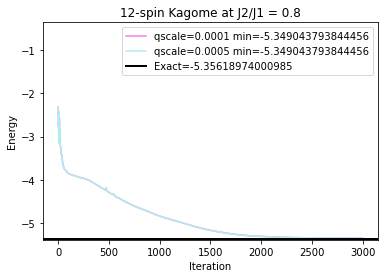

In [73]:
'''
Let's see the loss for loss1 and loss2 
'''
fig, ax1 = plt.subplots()
ax1.plot(iteration1, loss1, color='violet', label='qscale=0.0001 min={}'.format(min(loss1)))
ax1.plot(iteration1, loss2, color='paleturquoise', label='qscale=0.0005 min={}'.format(min(loss2)))

ax1.set_ylabel('Energy')
ax1.set_xlabel('Iteration')
ax1.set_ylim([E_gs -0.03,E_gs + 5])
# plt.axis([0,iters_RBM[-1],exact_gs_energy-0.03,exact_gs_energy+0.2])
plt.axhline(y=E_gs, xmin=0,
                 linewidth=2, color='k', label='Exact={}'.format(E_gs))
ax1.legend()
plt.title('12-spin Kagome at J2/J1 = 0.8')
plt.show()



In [74]:
J = [1, 0.5]
lattice4 =[[(1,2), (1,8), (2,3), (2,7), (3,4), (3,6), (4,5), (5,6), (5, 12),
            (6,7), (6, 11), (7, 10), (7, 8), (8,9), (9, 10), (10, 11), (11, 12)],

           [(1,3), (1,9), (1,7), (2,4), (2,8), (2, 10), (2, 6), (3, 11), (3,5), (3,7),
            (4, 12), (4, 6), (5, 7), (5, 11), (6, 8), (6, 10), (6, 12),  (7, 9), (7, 11), (8, 10),
            (9, 11), (10, 12)]]
partit = [int(6),int(6)]
Nsites = int( 12)


CsnFourier = CSnGradient(J= J, lattice = lattice4, Nsites=Nsites,
                    partit=partit,p=int(3), num_samples =int(1000), max_iter = int(5001), lr=2e-2)


Ham_rep = CsnFourier.Ham_rep()

# print(CsnFilters.rep_mat_H)
E_gs, V_gs = eigh(Ham_rep.astype('float64'), subset_by_index=[0,1])
V_gs = V_gs[:,0]
E_gs = E_gs[0]
V_gs = jnp.asarray(V_gs)
print('True Ground state Energy via ED for partition {}:--- ({}) '.format(partit, E_gs))
# print('True Ground State wavefuncion in Sn irrep basis for partition {}:--- {}'.format(partit, V_gs))

print('Irrep Dims for {}: --- {}'.format(partit, CsnFourier.dim))


    


True Ground state Energy via ED for partition [6, 6]:--- (-5.35618974000985) 
Irrep Dims for [6, 6]: --- 132
